# Simple Linear Regression

# Importing Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Create our own data

In [22]:
datafile=pd.DataFrame()
datafile[0]=np.arange(2000,2021)
datafile[1]=[50,54,62,78,65,69,72,77,85,98,75,80,82,85,88,75,90,93,95,98,99]
datafile.columns=['Year','Placement']
datafile

,Year,Placement
0,2000,50
1,2001,54
2,2002,62
3,2003,78
4,2004,65
5,2005,69
6,2006,72
7,2007,77
8,2008,85
9,2009,98


# Checking linearity

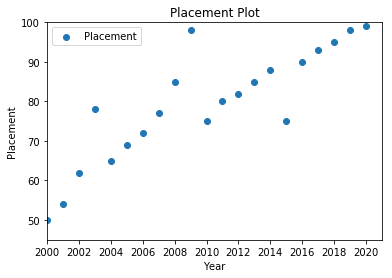

In [24]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement Plot")
plt.xlim(2000,2021)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2021,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

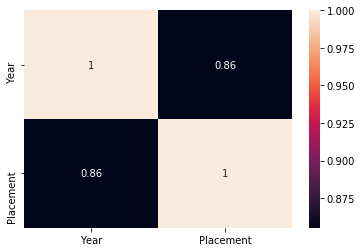

In [25]:
import seaborn as sb
data_corr=datafile.corr()
sb.heatmap(data_corr,annot=True)

In [26]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
train_x=np.asanyarray(datafile[['Year']])
train_y=np.asanyarray(datafile[['Placement']])
#print(train_x)
#print(train_y)
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)


Coefficients: [[1.94675325]]
Intercept: [-3833.45021645]


# Plotoutputs

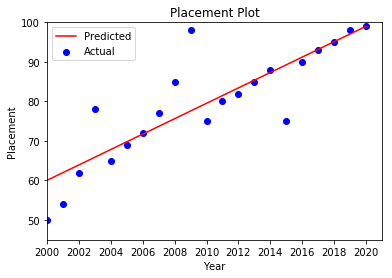

In [27]:
plt.scatter(datafile.Year,datafile.Placement,   color='blue',label="Actual")
plt.plot(train_x,regress.coef_[0][0]*train_x+regress.intercept_[0],'-r',label="Predicted")
plt.title("Placement Plot")
plt.xlim(2000,2021)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2021,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [11]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted']=y_predicted

print(datafile.head())
datafile.to_csv(r"C:\Users\DR.Noor Mahammad SK\Downloads\Placement.csv")

[50] [60.05627706]
[54] [62.0030303]
[62] [63.94978355]
[78] [65.8965368]
[65] [67.84329004]
[69] [69.79004329]
[72] [71.73679654]
[77] [73.68354978]
[85] [75.63030303]
[98] [77.57705628]
[75] [79.52380952]
[80] [81.47056277]
[82] [83.41731602]
[85] [85.36406926]
[88] [87.31082251]
[75] [89.25757576]
[90] [91.204329]
[93] [93.15108225]
[95] [95.0978355]
[98] [97.04458874]
[99] [98.99134199]
   Year  Placement  Predicted
0  2000         50  60.056277
1  2001         54  62.003030
2  2002         62  63.949784
3  2003         78  65.896537
4  2004         65  67.843290


# Performance Measurement

# Any of the following metrics can be used
1) Mean Absolute error
2) Mean Squared error
3) Root Mean Squared error
4) R-Square (not error)

In [28]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))

Mean Absolute error  4.488476602762365
Mean Squared error  51.002618016903796
Root Mean Squared error  7.141611724037075


In [29]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(datafile[['Year']])
test_y=np.asanyarray(datafile[['Placement']])
test_y_predicted=regress.predict(test_x)
print('Mean Absolute error (MAE)', np.mean(np.absolute(test_y_predicted-test_y)))
print('Mean Squared error (MSE)', np.mean(test_y_predicted-test_y)**2)
print('R2 score:%0.2f ', r2_score(test_y,test_y_predicted))


Mean Absolute error (MAE) 4.488476602762365
Mean Squared error (MSE) 1.1723081243665357e-26
R2 score:%0.2f (RMSE) 0.7315138999516011


# Using Training and Testing Data

In [34]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(datafile[['Year']],datafile[['Placement']],test_size=0.30)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)



    Year
6   2006
4   2004
11  2011
18  2018
15  2015
1   2001
7   2007
9   2009
8   2008
17  2017
12  2012
20  2020
5   2005
0   2000
Testing
    Year
19  2019
10  2010
3   2003
14  2014
16  2016
2   2002
13  2013
Coefficients: [[2.07038123]]
Intercept: [-4082.2882279]


In [35]:
y_predicted=regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)


    Year
19  2019
10  2010
3   2003
14  2014
16  2016
2   2002
13  2013
    Placement
19         98
10         75
3          78
14         88
16         90
2          62
13         85
[[97.81147884]
 [79.17804776]
 [64.68537914]
 [87.45957269]
 [91.60033515]
 [62.61499791]
 [85.38919145]]


In [36]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(test_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(test_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(test_y,y_predicted)))


Mean Absolute error  2.975163085762233
Mean Squared error  28.307654101103434
Root Mean Squared error  5.320493783579061


In [40]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regress,datafile[['Year']],datafile[['Placement']],cv=5,scoring='r2')
print(accuracy)

[-0.27773705  0.1548425  -0.56796311 -1.02592642  0.92952204]
